In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_scores_df
from dogo.datasets import evaluation_datasets

In [38]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [39]:
training_datasets = [
    "D3RLPY-MP2-P2_100000",
    "D3RLPY-MP3-P0_100000",
    "D3RLPY-PAP5-P0_100000",
    "D3RLPY-PAP6-P4_100000",
    "D3RLPY-PAP7-P0_100000",
]

experiments_no_rex = ['MP277', 'MP278', 'MP279']
experiments_mse_01 = ['MP280', 'MP281', 'MP282']
experiments_mse_1  = ['MP283', 'MP284', 'MP285']
experiments_mse_5  = ['MP289', 'MP290', 'MP291']
experiments_mse_10 = ['MP286', 'MP287', 'MP288']
experiments_mse_20 = ['MP292', 'MP293', 'MP294']

In [41]:
scores_no_rex_df = get_scores_df(experiments_no_rex, evaluation_datasets)
scores_mse_01_df = get_scores_df(experiments_mse_01, evaluation_datasets)
scores_mse_1_df = get_scores_df(experiments_mse_1, evaluation_datasets)
scores_mse_5_df = get_scores_df(experiments_mse_5, evaluation_datasets)
scores_mse_10_df = get_scores_df(experiments_mse_10, evaluation_datasets)
scores_mse_20_df = get_scores_df(experiments_mse_20, evaluation_datasets)

In [42]:
scores_no_rex_groups = (
    scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_no_rex_avgs_df = scores_no_rex_groups.mean().reset_index()
scores_no_rex_mins_df = scores_no_rex_groups.min().reset_index()
scores_no_rex_maxs_df = scores_no_rex_groups.max().reset_index()

scores_mse_01_groups = (
    scores_mse_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_01_avgs_df = scores_mse_01_groups.mean().reset_index()
scores_mse_01_mins_df = scores_mse_01_groups.min().reset_index()
scores_mse_01_maxs_df = scores_mse_01_groups.max().reset_index()

scores_mse_1_groups = (
    scores_mse_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_1_avgs_df = scores_mse_1_groups.mean().reset_index()
scores_mse_1_mins_df = scores_mse_1_groups.min().reset_index()
scores_mse_1_maxs_df = scores_mse_1_groups.max().reset_index()

scores_mse_5_groups = (
    scores_mse_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_5_avgs_df = scores_mse_5_groups.mean().reset_index()
scores_mse_5_mins_df = scores_mse_5_groups.min().reset_index()
scores_mse_5_maxs_df = scores_mse_5_groups.max().reset_index()

scores_mse_10_groups = (
    scores_mse_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_10_avgs_df = scores_mse_10_groups.mean().reset_index()
scores_mse_10_mins_df = scores_mse_10_groups.min().reset_index()
scores_mse_10_maxs_df = scores_mse_10_groups.max().reset_index()

scores_mse_20_groups = (
    scores_mse_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_20_avgs_df = scores_mse_20_groups.mean().reset_index()
scores_mse_20_mins_df = scores_mse_20_groups.min().reset_index()
scores_mse_20_maxs_df = scores_mse_20_groups.max().reset_index()

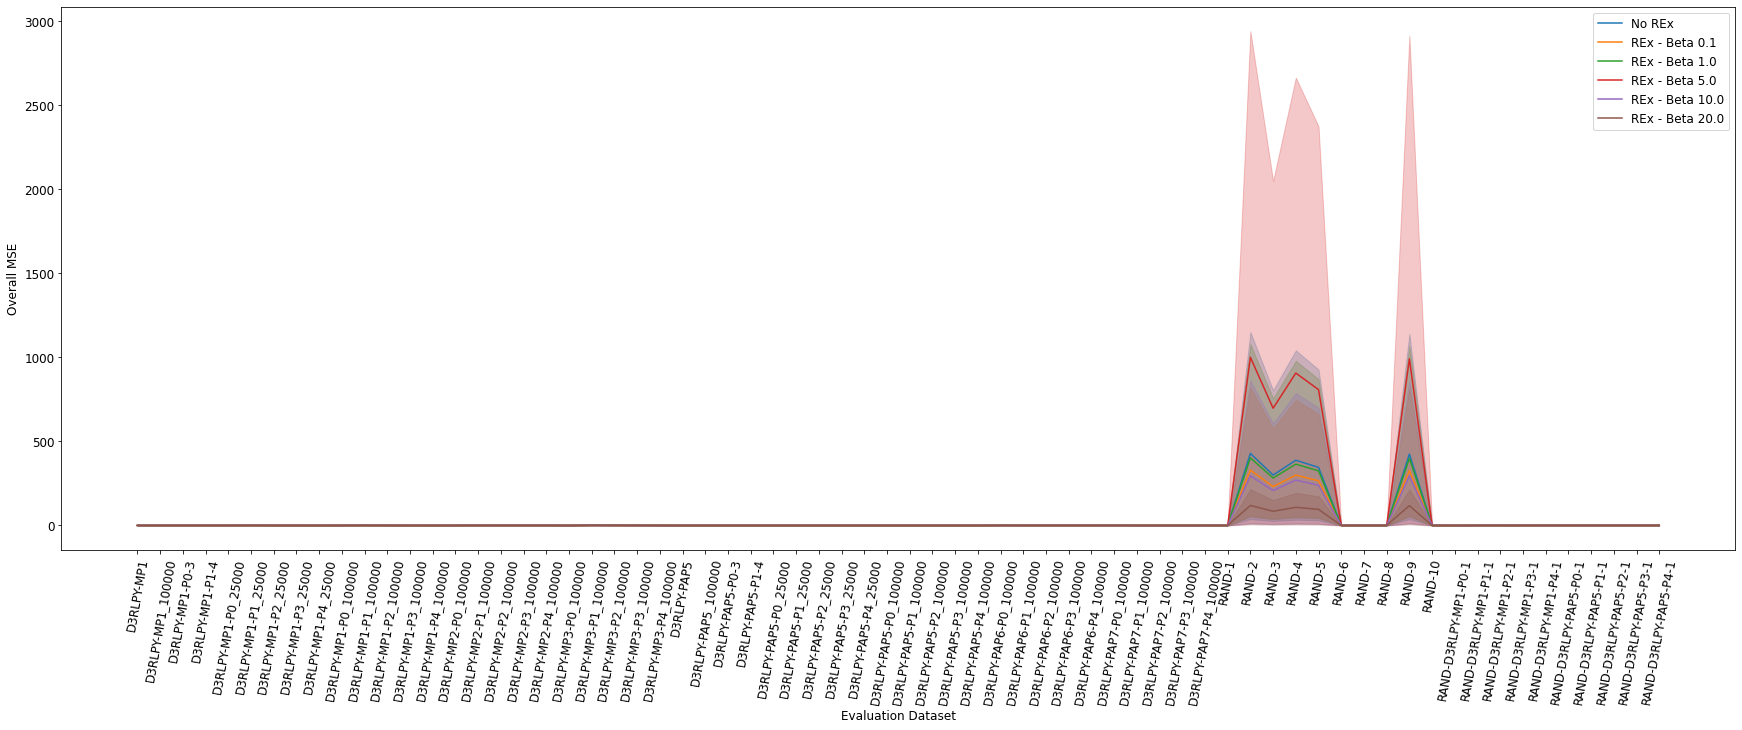

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 5.0', 'REx - Beta 10.0', 'REx - Beta 20.0']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_5_avgs_df, scores_mse_5_mins_df, scores_mse_5_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
    (scores_mse_20_avgs_df, scores_mse_20_mins_df, scores_mse_20_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

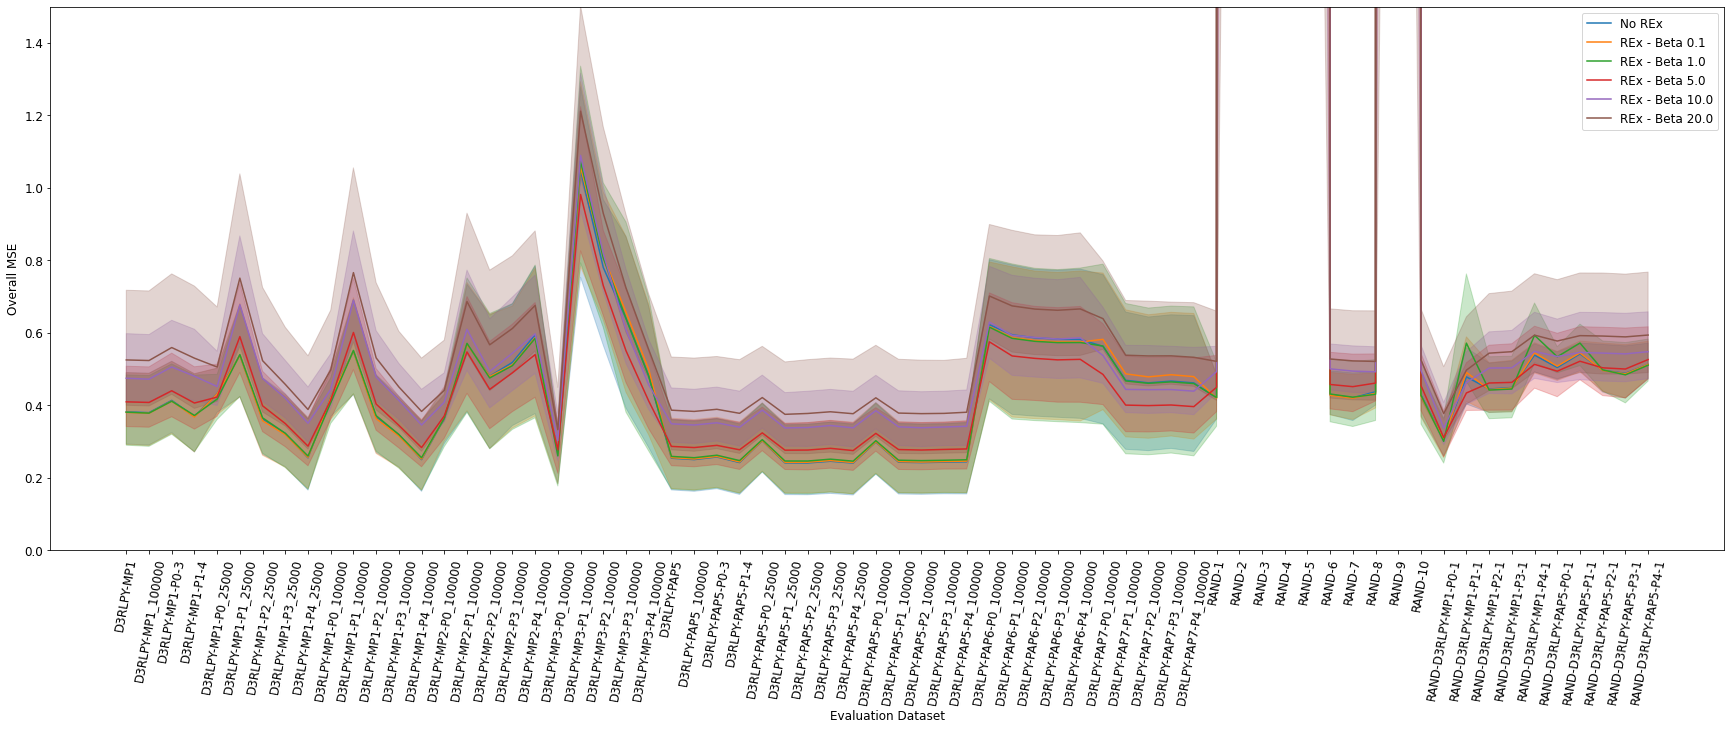

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 5.0', 'REx - Beta 10.0', 'REx - Beta 20.0']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_5_avgs_df, scores_mse_5_mins_df, scores_mse_5_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
    (scores_mse_20_avgs_df, scores_mse_20_mins_df, scores_mse_20_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.set_ylim(0.,1.5)
ax.legend()

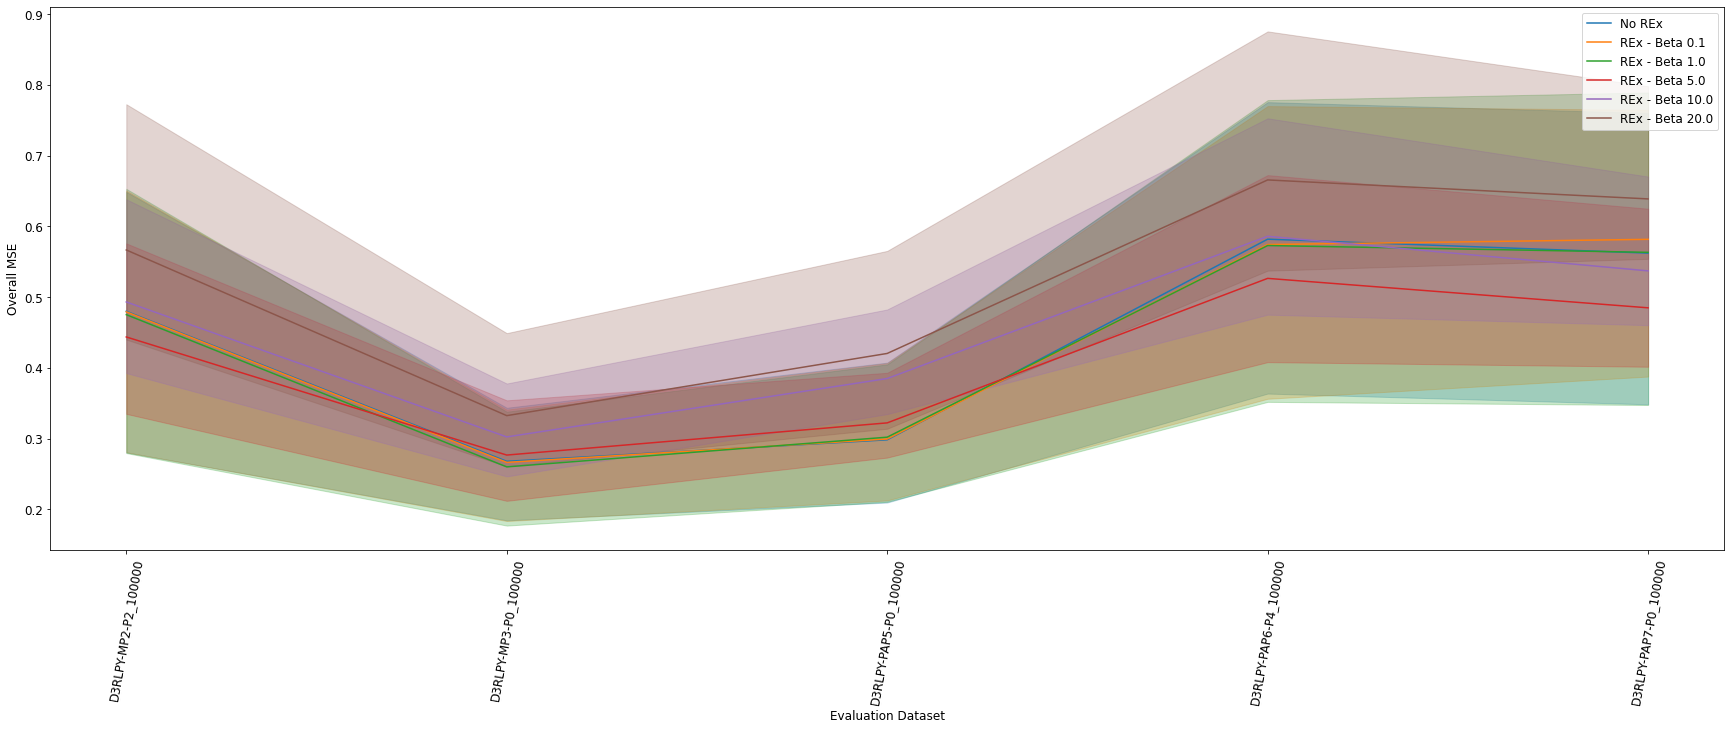

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 5.0', 'REx - Beta 10.0', 'REx - Beta 20.0']

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_5_avgs_df, scores_mse_5_mins_df, scores_mse_5_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
    (scores_mse_20_avgs_df, scores_mse_20_mins_df, scores_mse_20_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

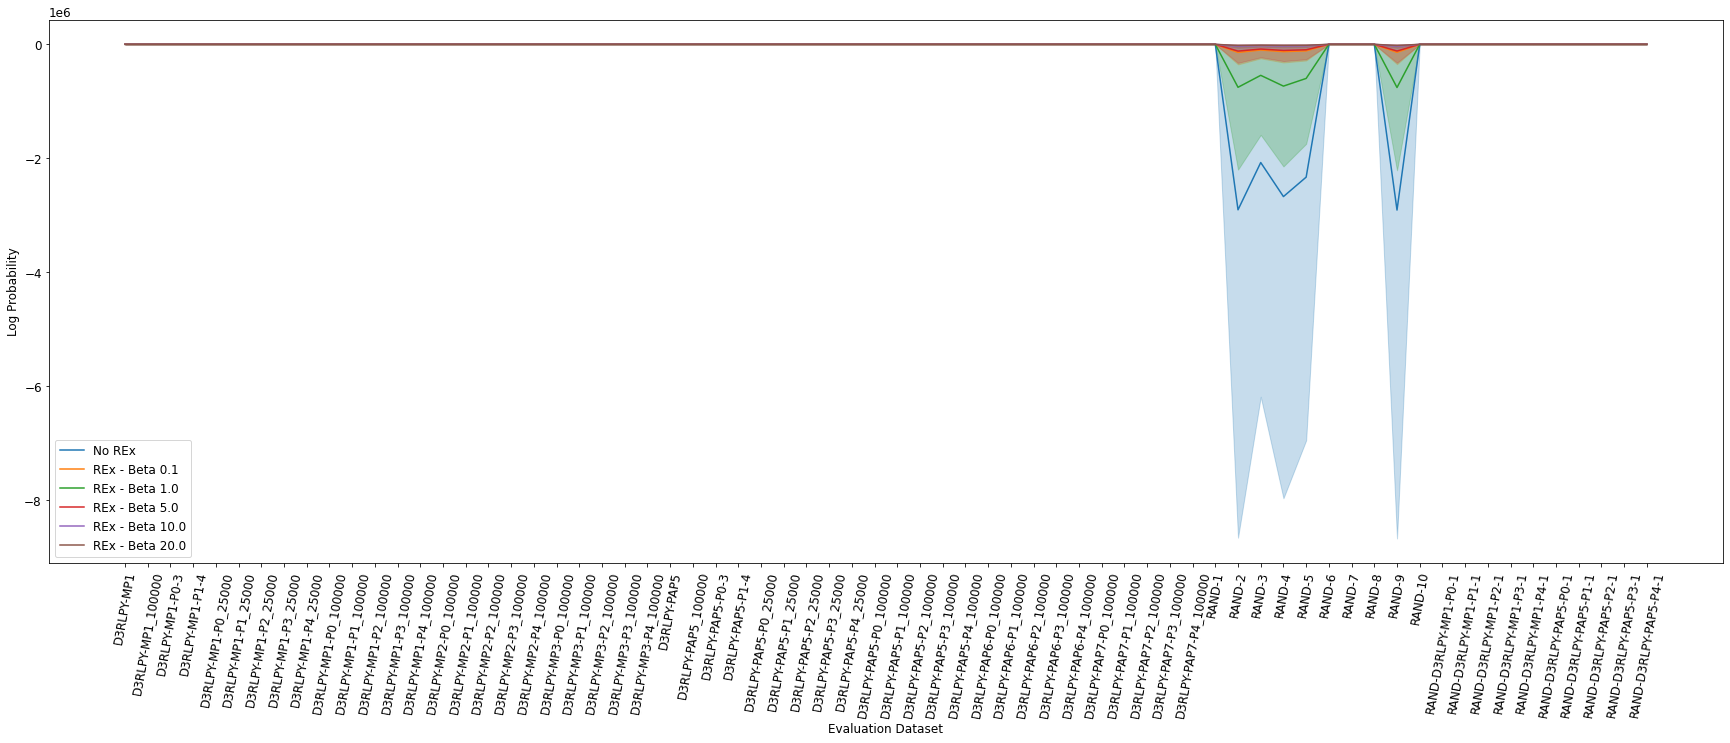

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 5.0', 'REx - Beta 10.0', 'REx - Beta 20.0']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_5_avgs_df, scores_mse_5_mins_df, scores_mse_5_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
    (scores_mse_20_avgs_df, scores_mse_20_mins_df, scores_mse_20_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

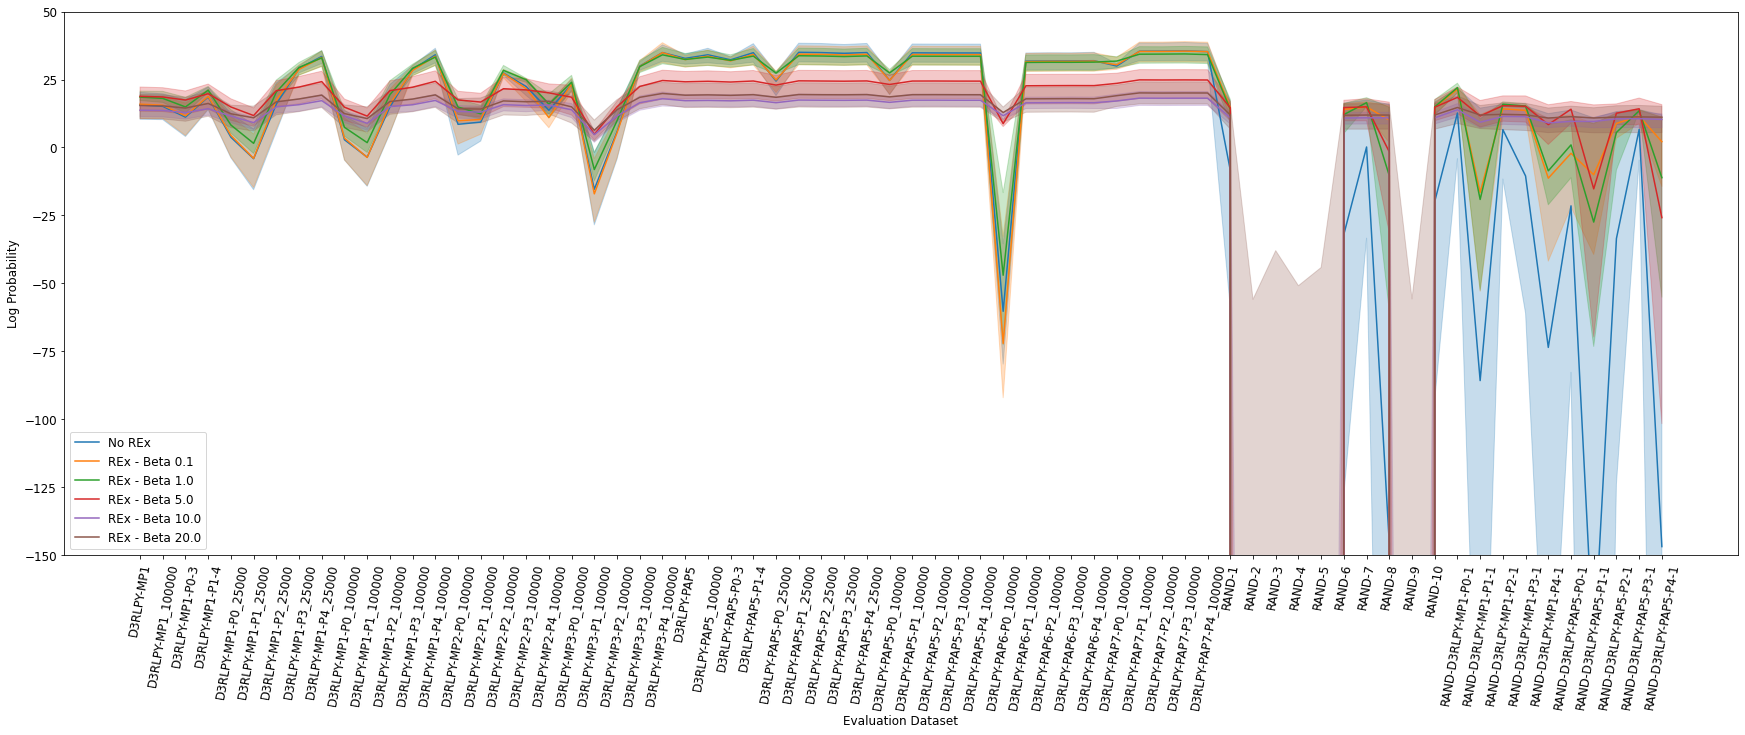

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 5.0', 'REx - Beta 10.0', 'REx - Beta 20.0']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_5_avgs_df, scores_mse_5_mins_df, scores_mse_5_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
    (scores_mse_20_avgs_df, scores_mse_20_mins_df, scores_mse_20_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-150.,50.)
ax.legend()

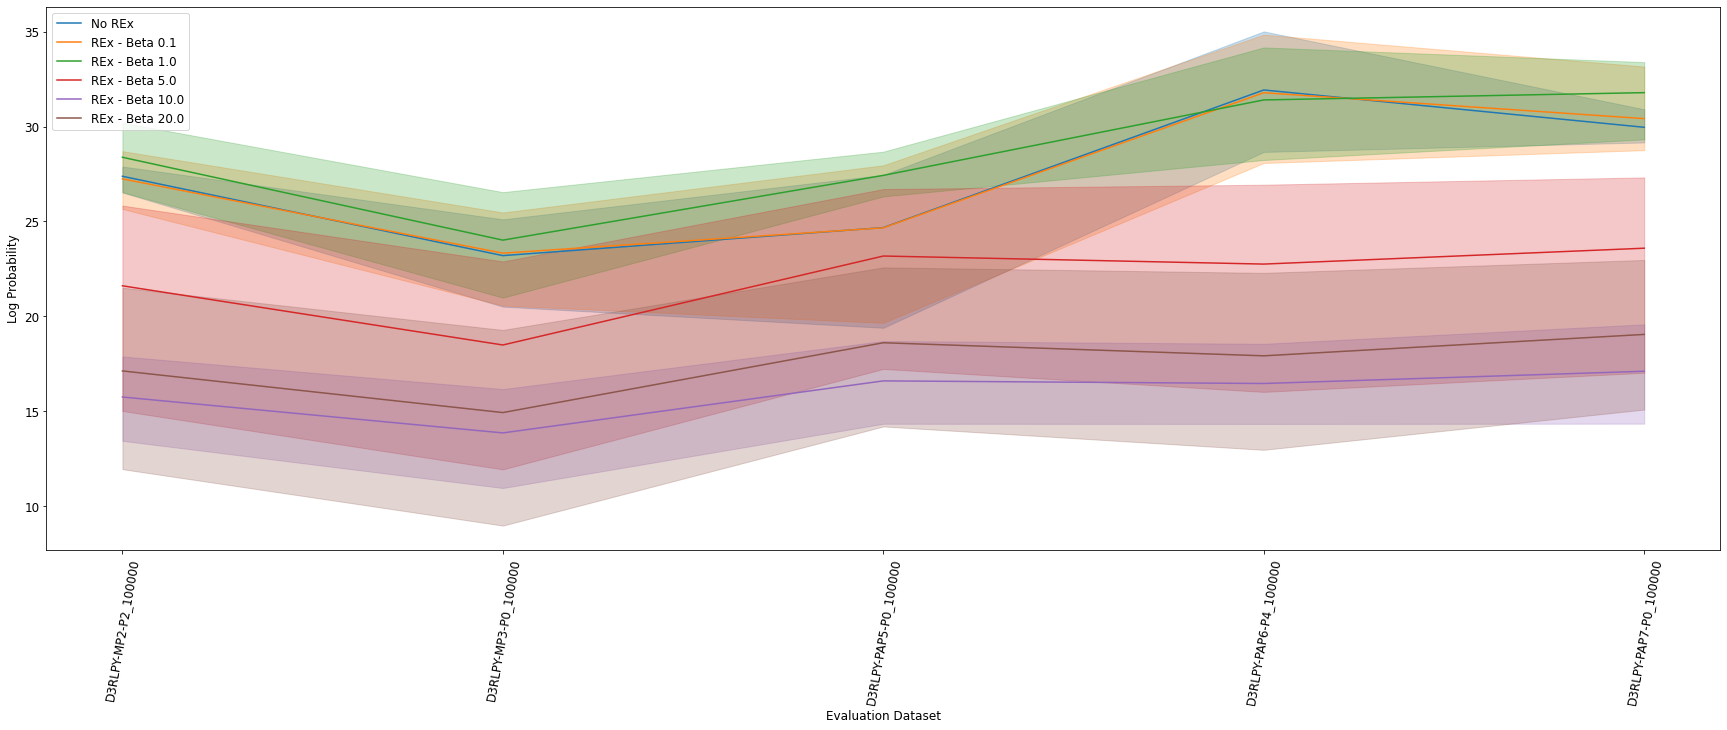

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

lss =  ['-', '--']
labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 5.0', 'REx - Beta 10.0', 'REx - Beta 20.0']

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_5_avgs_df, scores_mse_5_mins_df, scores_mse_5_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
    (scores_mse_20_avgs_df, scores_mse_20_mins_df, scores_mse_20_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()